[Tutorial1](https://towardsdatascience.com/gaussian-mixture-models-gmm-6e95cbc38e6e)

[Tutorial2](https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f)

[Tutorial 3](https://machinelearningmastery.com/expectation-maximization-em-algorithm/)

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference.

If the likelihood function is differentiable, the derivative test for determining maxima can be applied. In some cases, the first-order conditions of the likelihood function can be solved explicitly; for instance, the ordinary least squares estimator maximizes the likelihood of the linear regression model. Under most circumstances, however, numerical methods will be necessary to find the maximum of the likelihood function.

From the vantage point of Bayesian inference, MLE is a special case of maximum a posteriori estimation (MAP) that assumes a uniform prior distribution of the parameters. In frequentist inference, MLE is a special case of an extremum estimator, with the objective function being the likelihood.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (x0, y0)
x0 = 20
y0 = 10
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([x0, y0])

# generate zero centered stretched Gaussian data
C = np.array([[0.5, -0.6], [4, 0.6]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-40., 40.)
y = np.linspace(-40., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX) # 	Compute the weighted log probabilities for each sample.
Z = Z.reshape(X.shape)

score = clf.score(X_train) # 	Compute the weighted log probabilities for each sample.
prob = clf.predict_proba(X_train) # 	Predict posterior probability of each component given the data.

labels = clf.predict(X_train) # Predict the labels for the data samples in X using trained model.

print('params:', clf.get_params())
print('labels:',labels)
print('Score:',score)
print('prob:', prob)
print('AIC:', clf.aic(X_train))
print('BIC:', clf.bic(X_train))

params: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

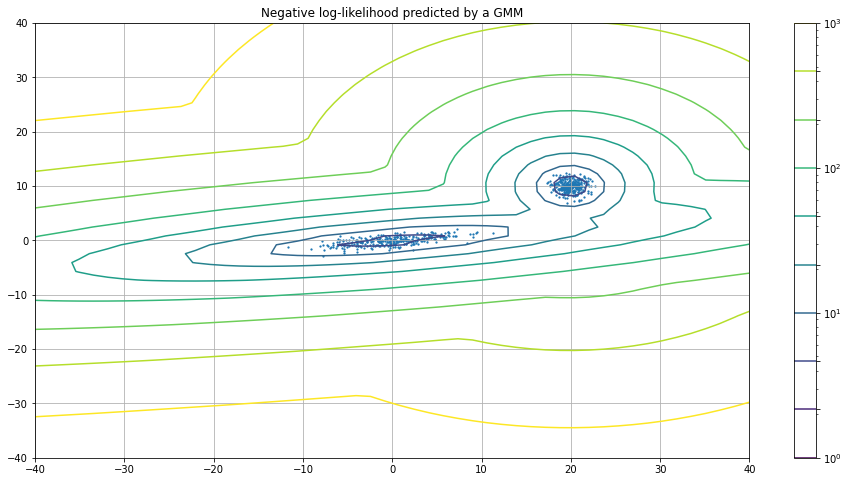

In [35]:
plt.figure(figsize=(16,8))
CS = plt.contour(X, Y, Z,
                 norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS,
                  shrink=1,
                  extend='both')
plt.scatter(X_train[:, 0],
            X_train[:, 1],
            1.5)

plt.grid()
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [24]:
scor

-3.978570470828635